In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use("ggplot")

In [91]:
df= pd.read_csv("yield_df.csv")

In [92]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [93]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [94]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [96]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(2310)

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.duplicated().sum()

np.int64(0)

In [100]:
df.shape

(25932, 7)

In [101]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [102]:
print(df.dtypes)

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object


In [103]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
print(corr_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091327   
hg/ha_yield                    0.091327     1.000000   
average_rain_fall_mm_per_year -0.006423    -0.004067   
pesticides_tonnes              0.135127     0.065523   
avg_temp                       0.013701    -0.110400   

                               average_rain_fall_mm_per_year  \
Year                                               -0.006423   
hg/ha_yield                                        -0.004067   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.161483   
avg_temp                                            0.333694   

                               pesticides_tonnes  avg_temp  
Year                                    0.135127  0.013701  
hg/ha_yield                             0.065523 -0.110400  
average_rain_fall_mm_per_year           0.161483  0.333694  
pesticides_tonnes                 

In [104]:
#Data Visualization

In [105]:
print(df.columns)


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [106]:
len(df['Area'].unique())

101

In [107]:
len(df['Item'].unique())

10

<function matplotlib.pyplot.show(close=None, block=None)>

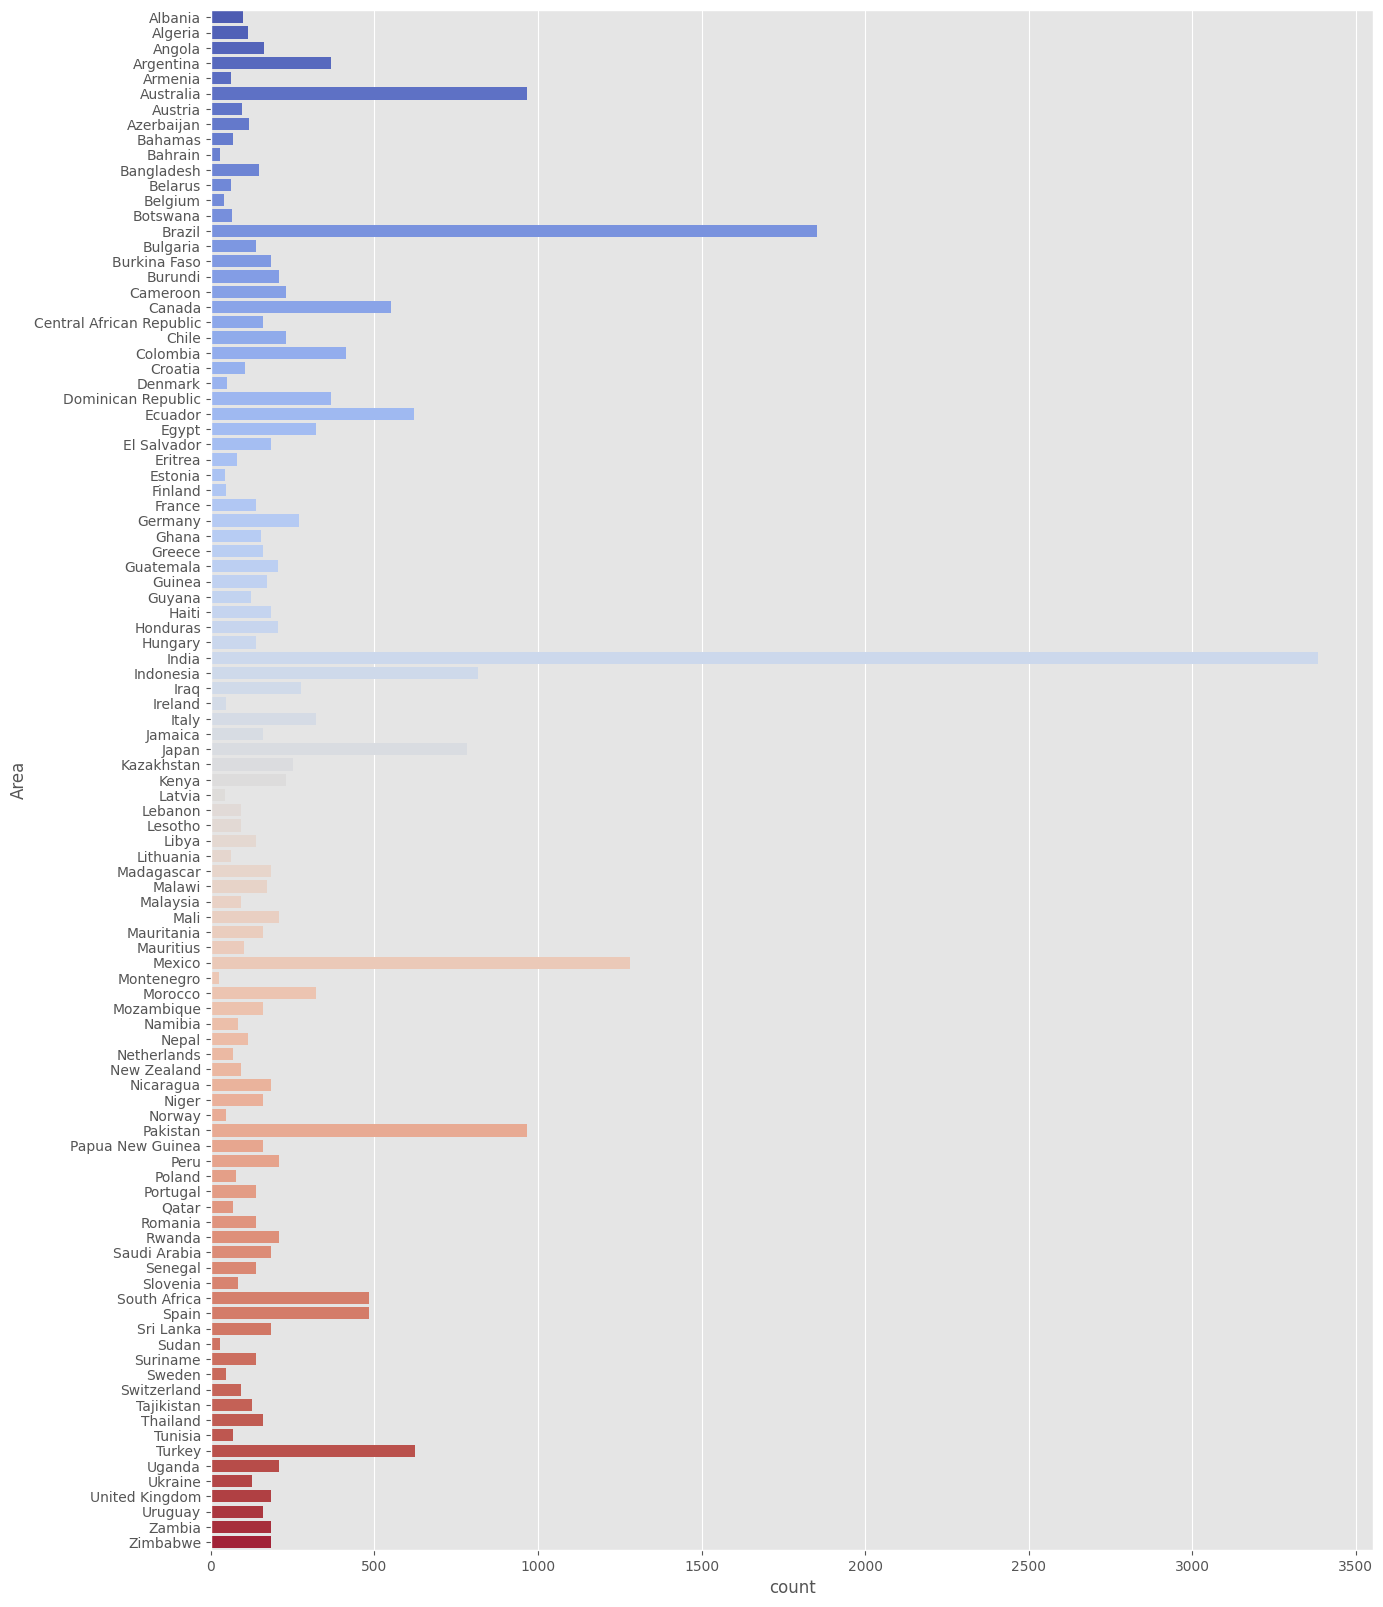

In [108]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'], hue=df['Area'], palette='coolwarm', legend=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

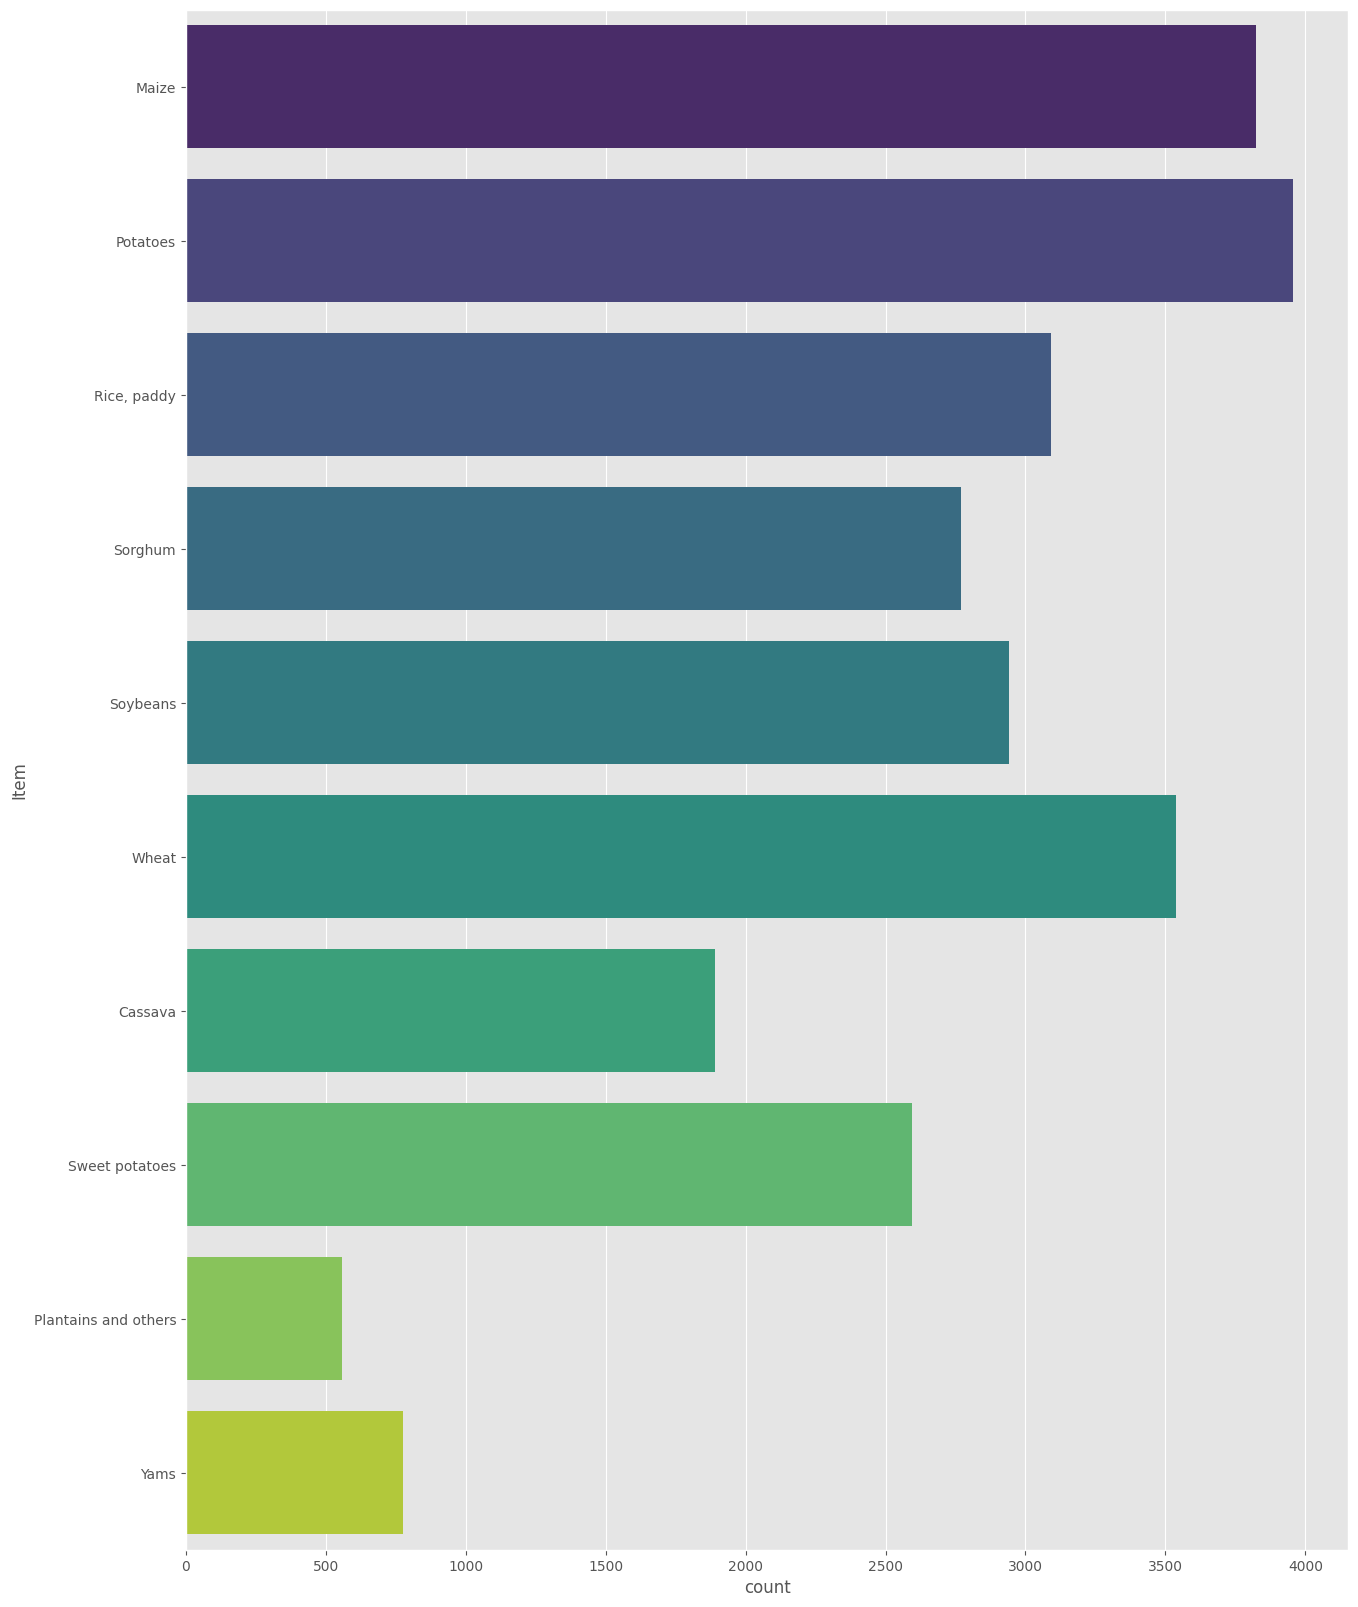

In [109]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Item'], hue=df['Item'], palette='viridis', legend=False)
plt.show

In [110]:
(df['Area'].value_counts() <400).sum

<bound method Series.sum of Area
India         False
Brazil        False
Mexico        False
Australia     False
Pakistan      False
              ...  
Latvia         True
Belgium        True
Bahrain        True
Sudan          True
Montenegro     True
Name: count, Length: 101, dtype: bool>

In [111]:
(df['Area'].value_counts() <400).sum()

np.int64(88)

In [112]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] ==state]['hg/ha_yield'].sum())
    

In [113]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [114]:
yield_per_country

[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

<function matplotlib.pyplot.show(close=None, block=None)>

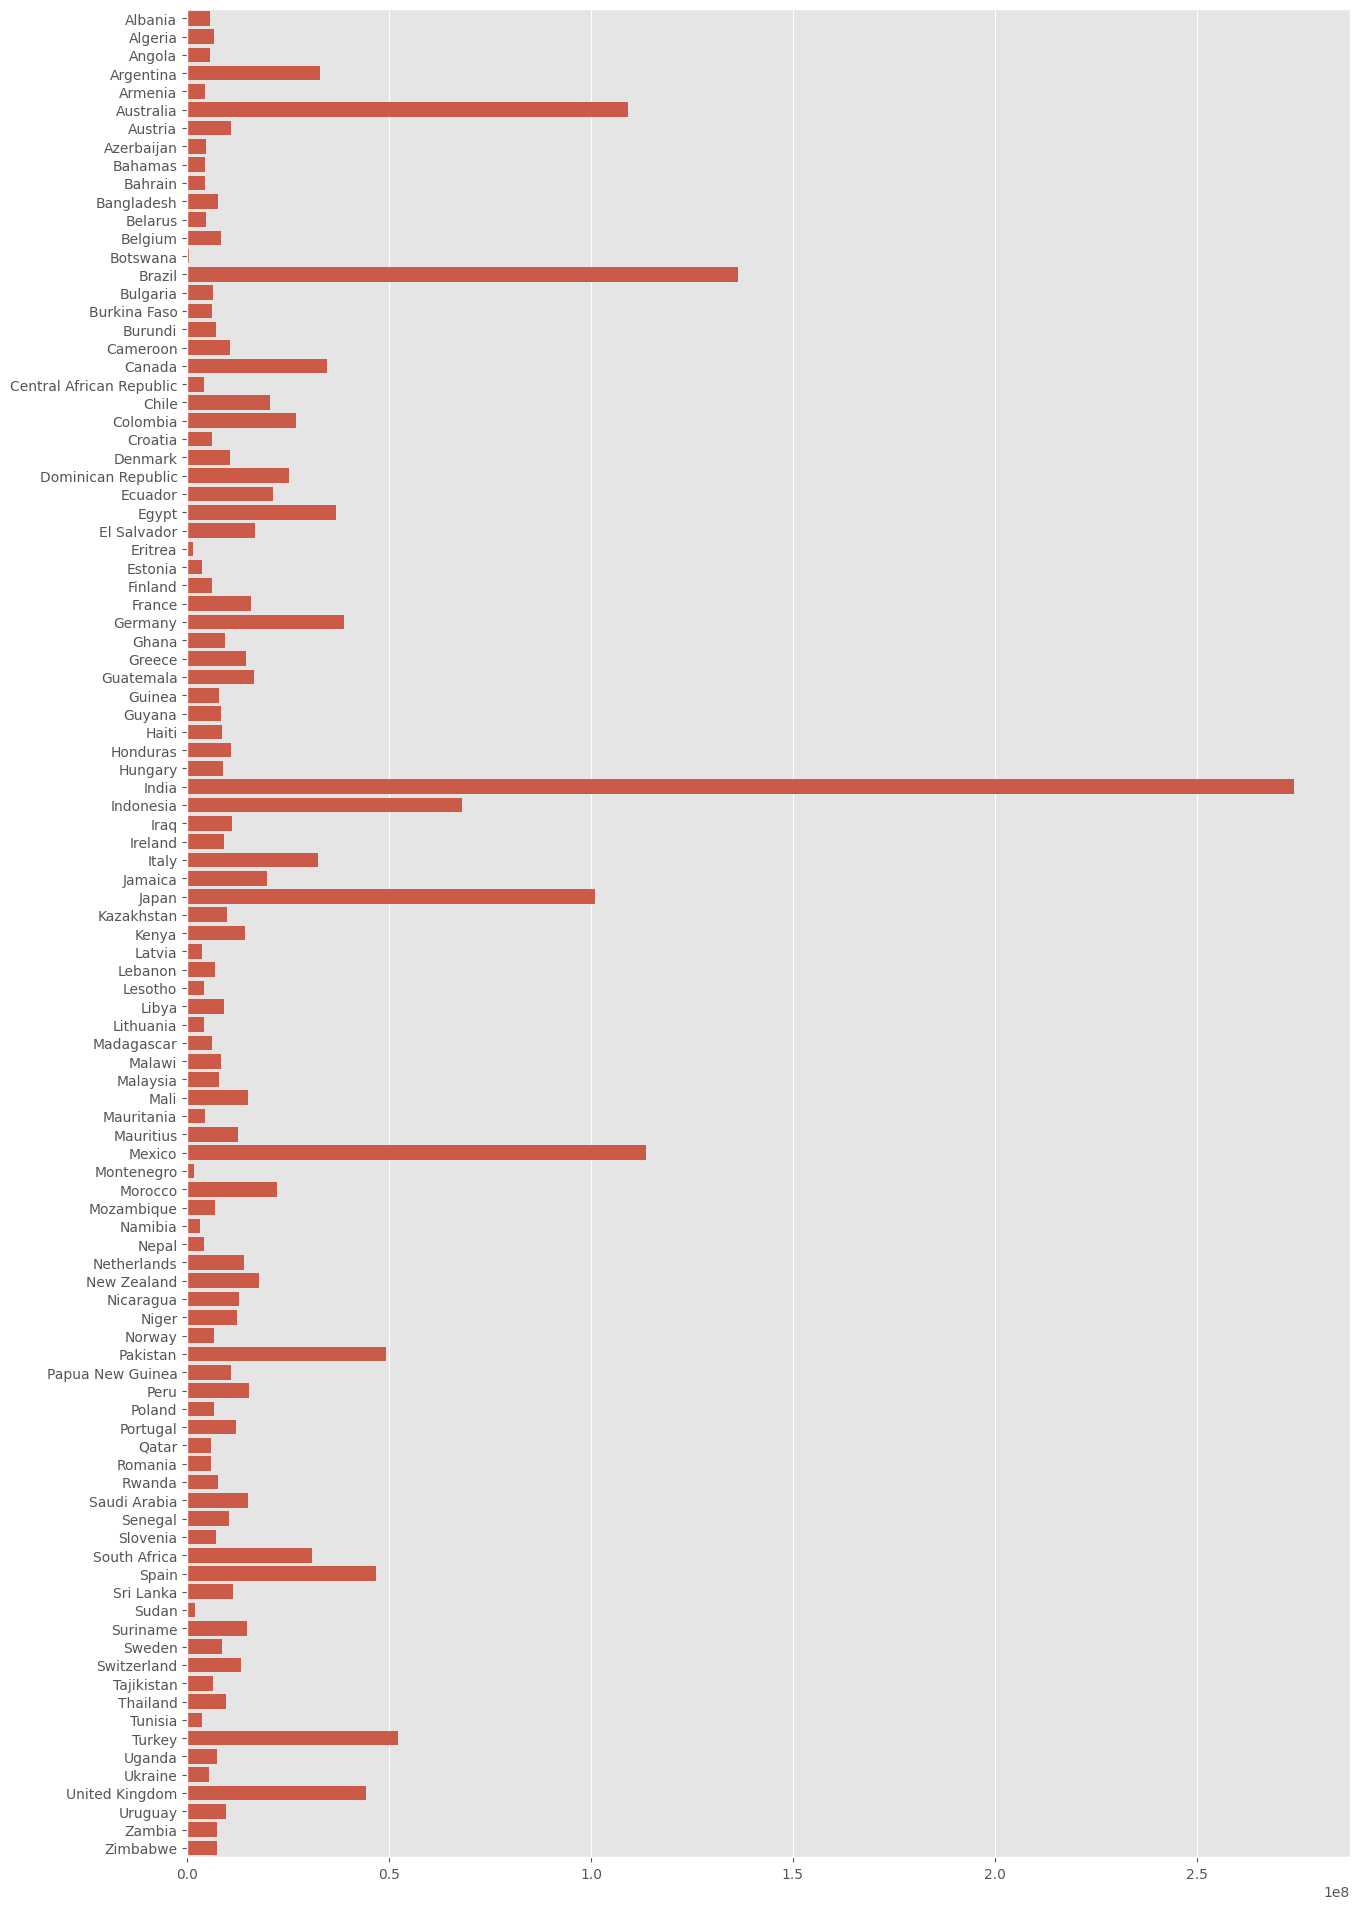

In [115]:
plt.figure(figsize=(15,24))
sns.barplot(y= country, x=yield_per_country)
plt.show

In [116]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

<function matplotlib.pyplot.show(close=None, block=None)>

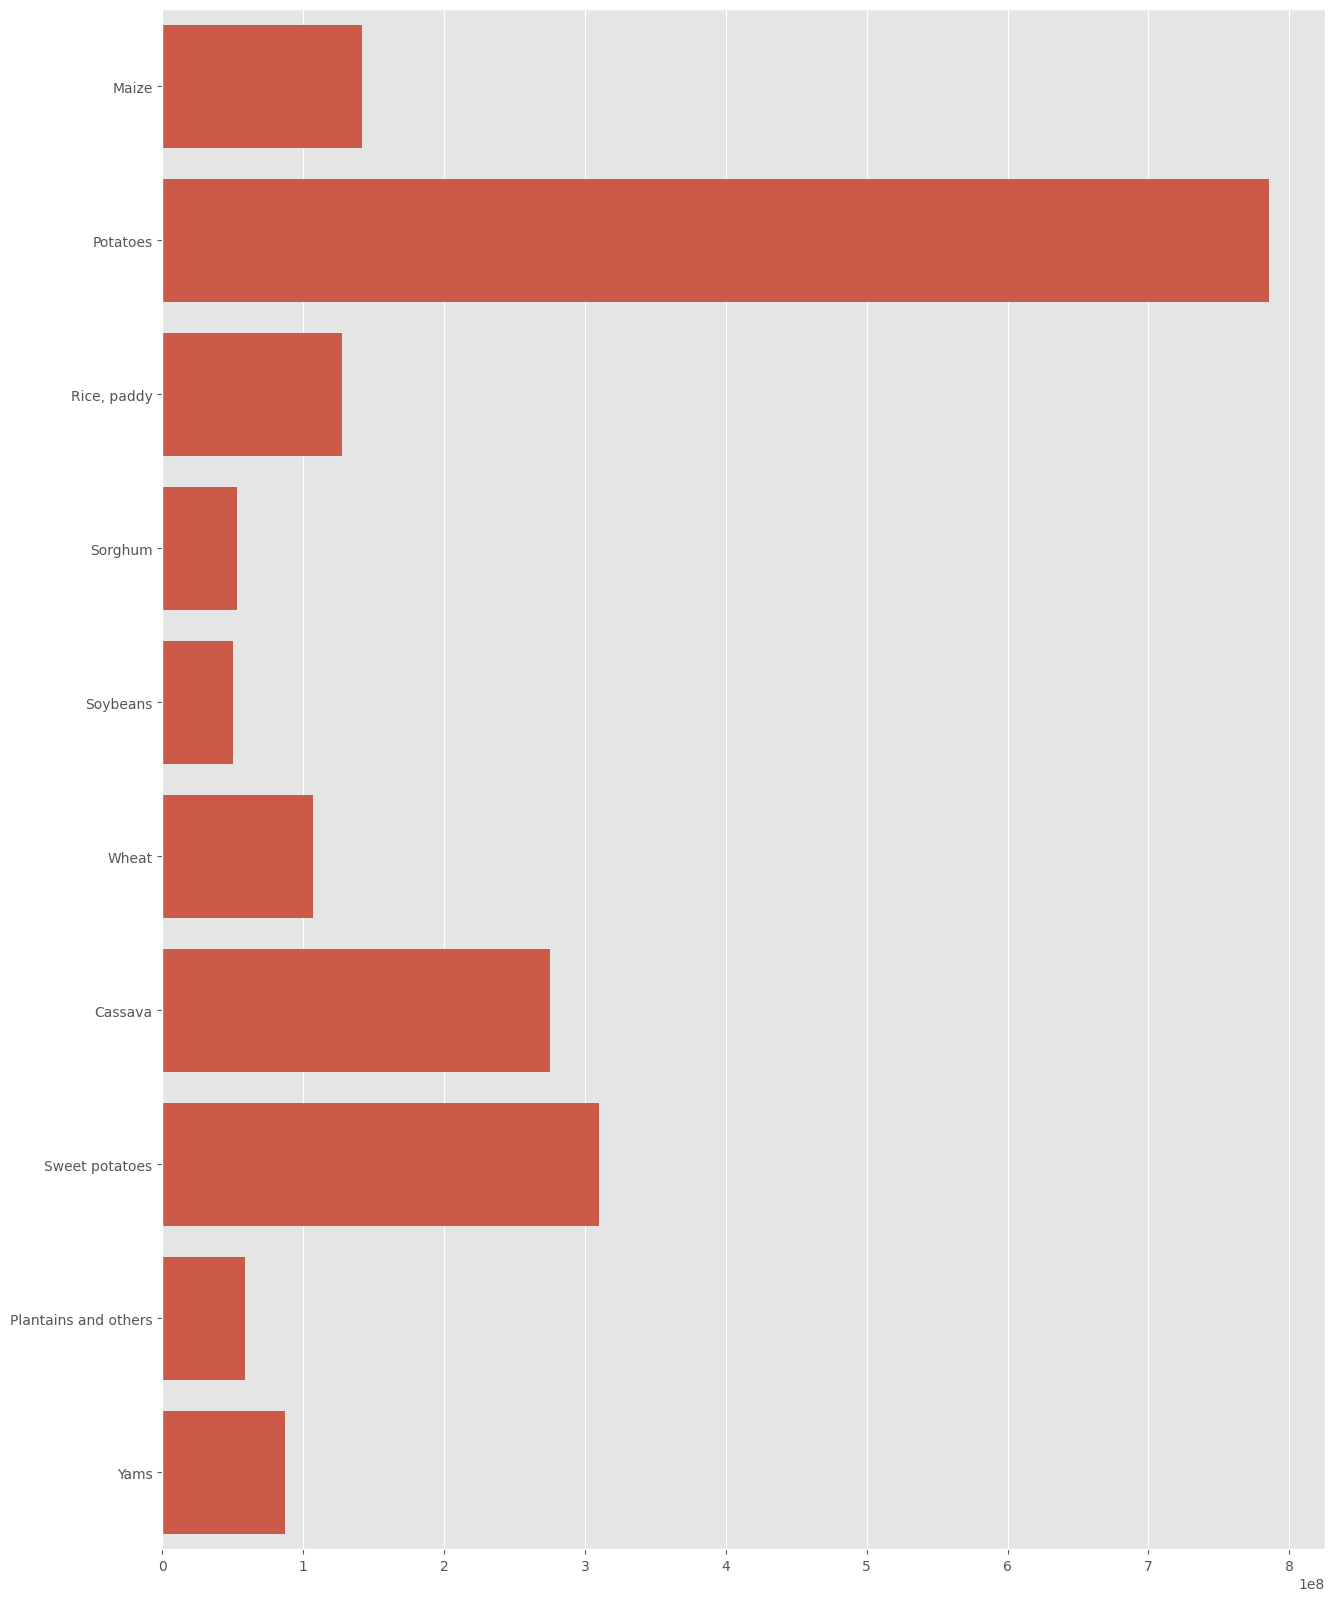

In [117]:
plt.figure(figsize=(15,20))
sns.barplot(y= crops, x=yield_per_crop)
plt.show

In [118]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [119]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [120]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']

In [121]:
df = df[col]

In [122]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [123]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [124]:
X.shape

(25932, 6)

In [125]:
y.shape

(25932,)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle = True)

In [127]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0, 1, 2, 3]),
        ('OneHotEncode', ohe, [4,5] )
    ], remainder = ('passthrough')
)

In [128]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.fit_transform(X_test)

In [129]:
preprocessor.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [131]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree' : DecisionTreeRegressor(),
    'KNN' : KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit (X_train_dummy, y_train)
    y_pred = md.predict (X_test_dummy)
    print(f"{name} : mae : {mean_absolute_error(y_test, y_pred)} score: {r2_score(y_test, y_pred)}")

Linear Regression : mae : 29897.28138119728 score: 0.747273256799154


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso : mae : 29883.830652070385 score: 0.7472938374682895
Ridge : mae : 29852.956963817032 score: 0.7472625765869877
Decision Tree : mae : 5511.5051089261615 score: 0.9672548118756051
KNN : mae : 4679.181530749952 score: 0.9846297814151388


In [132]:
dtr = DecisionTreeRegressor()
dtr.fit (X_train_dummy, y_train)
dtr.predict (X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

In [133]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [134]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [135]:
#Predictive System

In [136]:
def prediction (Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocessor.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield [0] [0]

In [137]:
result = prediction (1990, 1485.0, 121.0, 16.37, "Albania", "Maize")

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [138]:
result

np.float64(36613.0)

In [139]:
import pickle
pickle.dump(dtr, open("dtr.pkl", "wb"))
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))
